In [29]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [55]:
# dados
df = pd.read_csv('../data/insurance.csv', sep=',', encoding='utf-8')

In [3]:
# head
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# tail
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# shape
df.shape

(1338, 7)

In [6]:
# types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# check NA
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# estatisticas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
# moda
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


### atributos

In [58]:
categoricos = df.select_dtypes(include='object').columns
numericos = df.select_dtypes(include = ['int', 'float'])

#### categoricos

In [24]:
# distribuicao de valores
for i in categoricos:
    print(df[i].value_counts())
    print('\n'+'-'*50)

sex
male      676
female    662
Name: count, dtype: int64

--------------------------------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64

--------------------------------------------------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

--------------------------------------------------


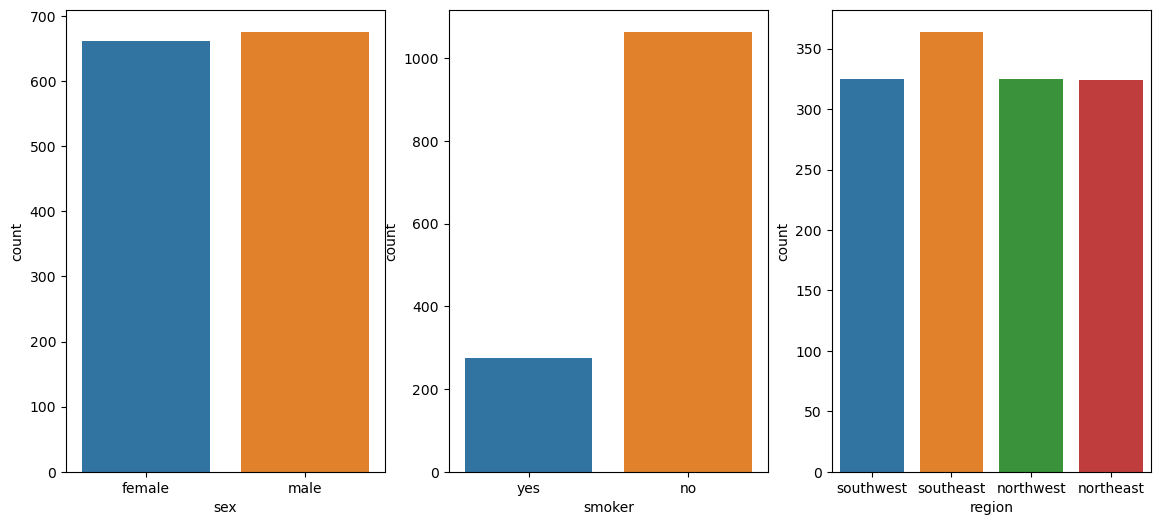

In [28]:
# plots
fig, ax = plt.subplots(nrows= int(np.ceil(len(categoricos) / 3)), ncols = 3, figsize=(14,6))
ax = ax.flatten()
for i, column in enumerate(categoricos):
    sns.countplot(df, x = df[column], ax = ax[i])

#### numéricos

/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

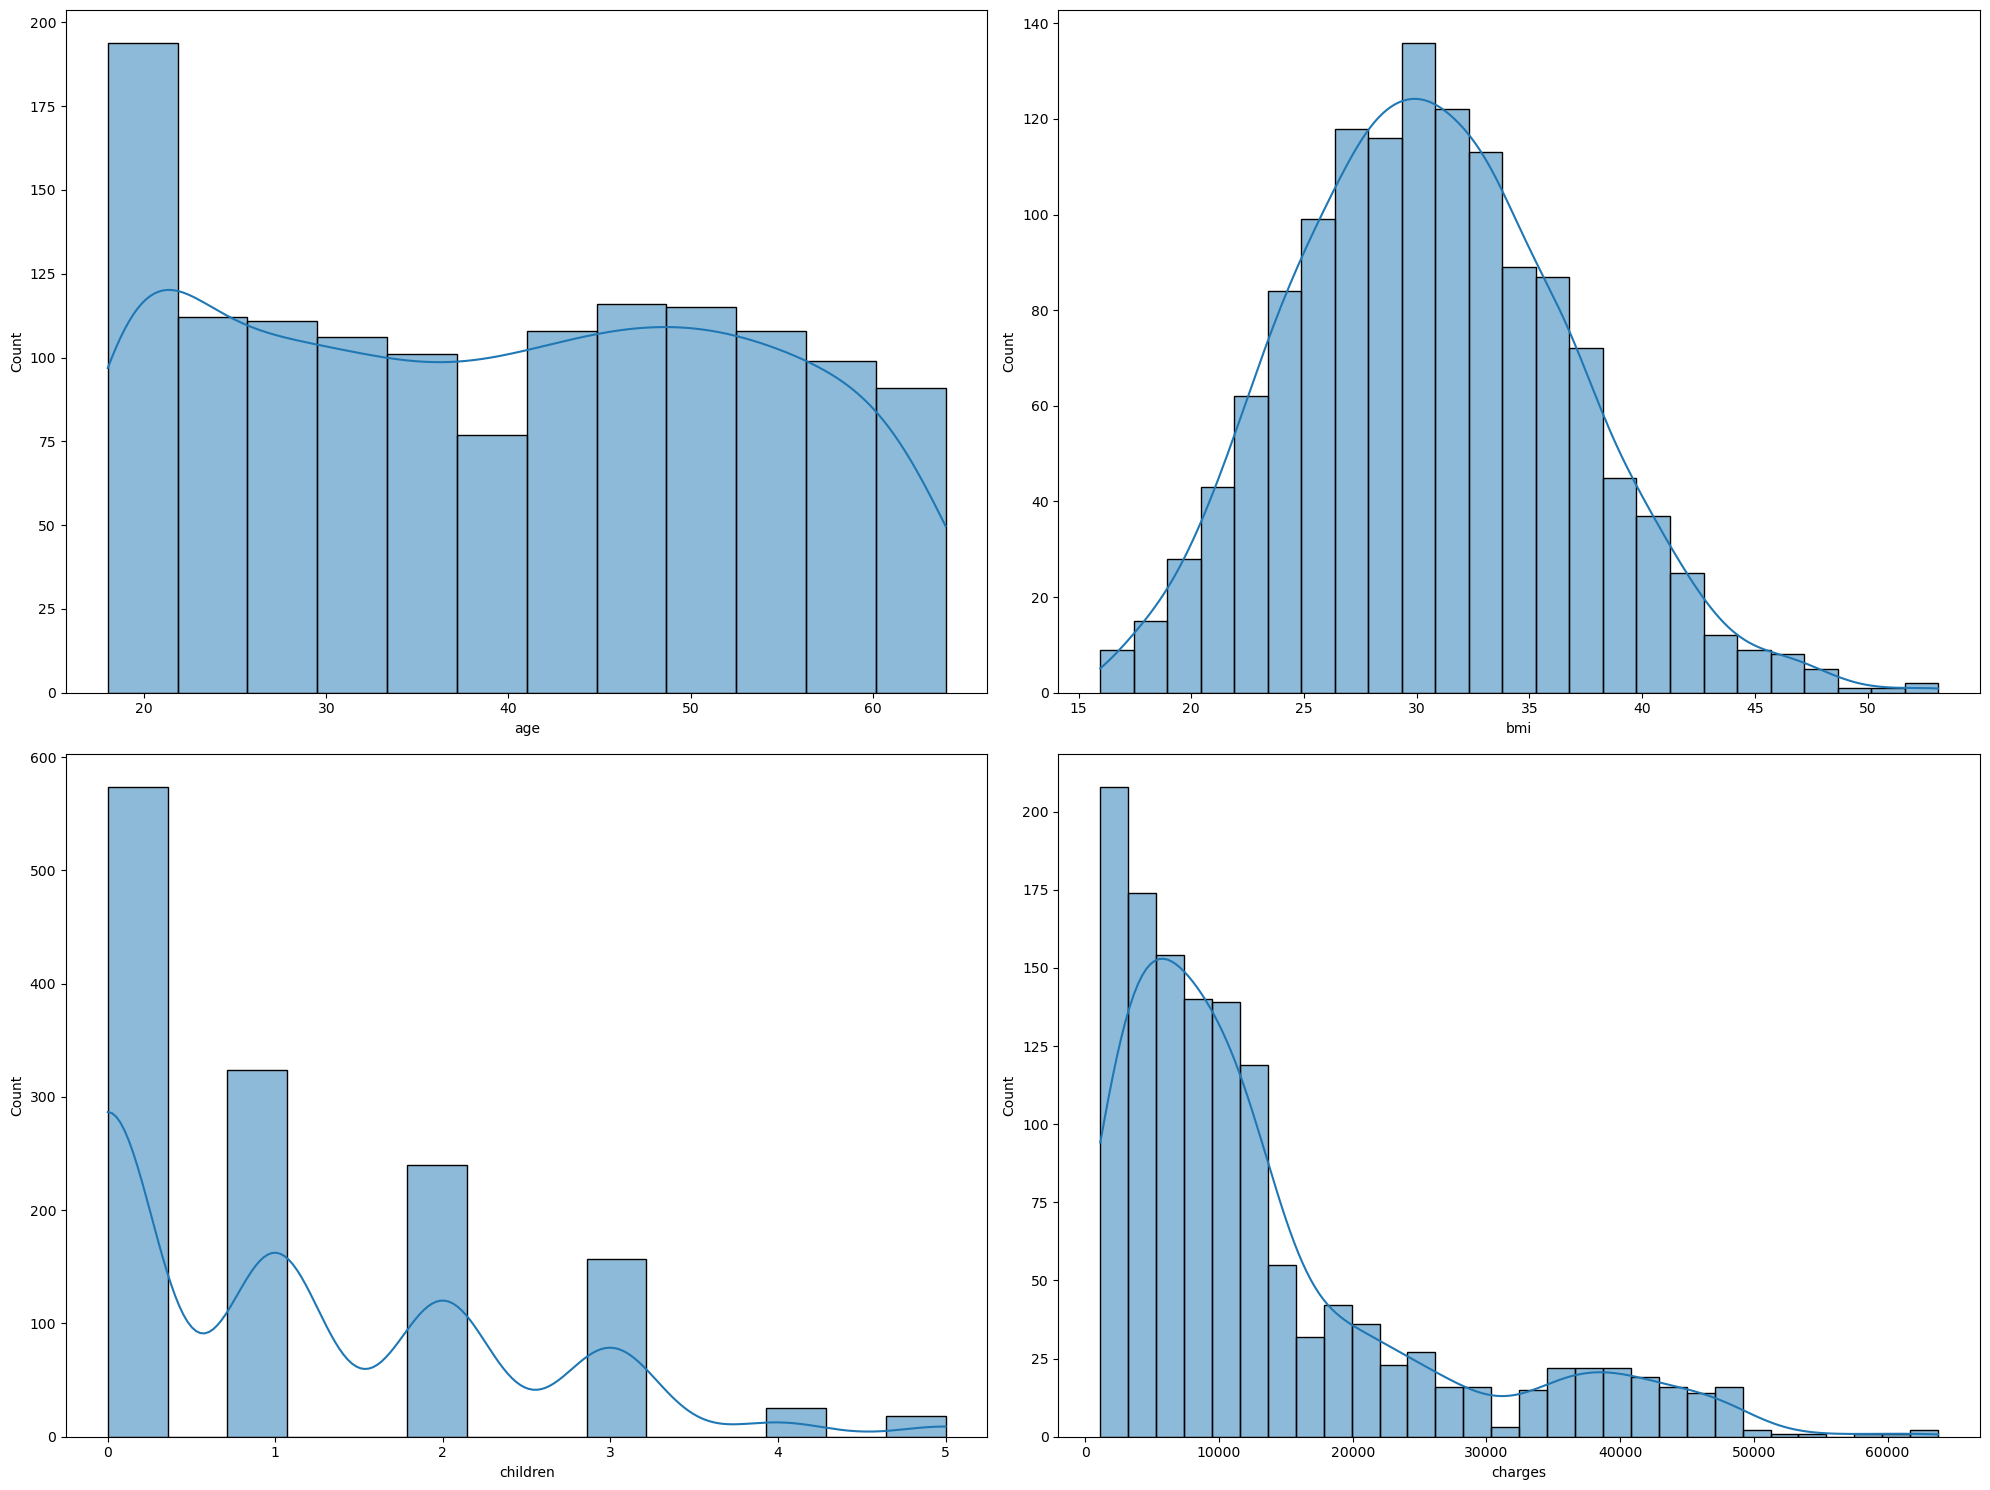

In [59]:
# histogramas
fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(numericos):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax)

plt.tight_layout()
plt.show()

In [61]:
# outliers
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in df.select_dtypes(include=np.number).columns:
    print("{:<15} {:>6}".format(col, len(count_outliers(df, col))))

age                  0
bmi                  9
children             0
charges            139


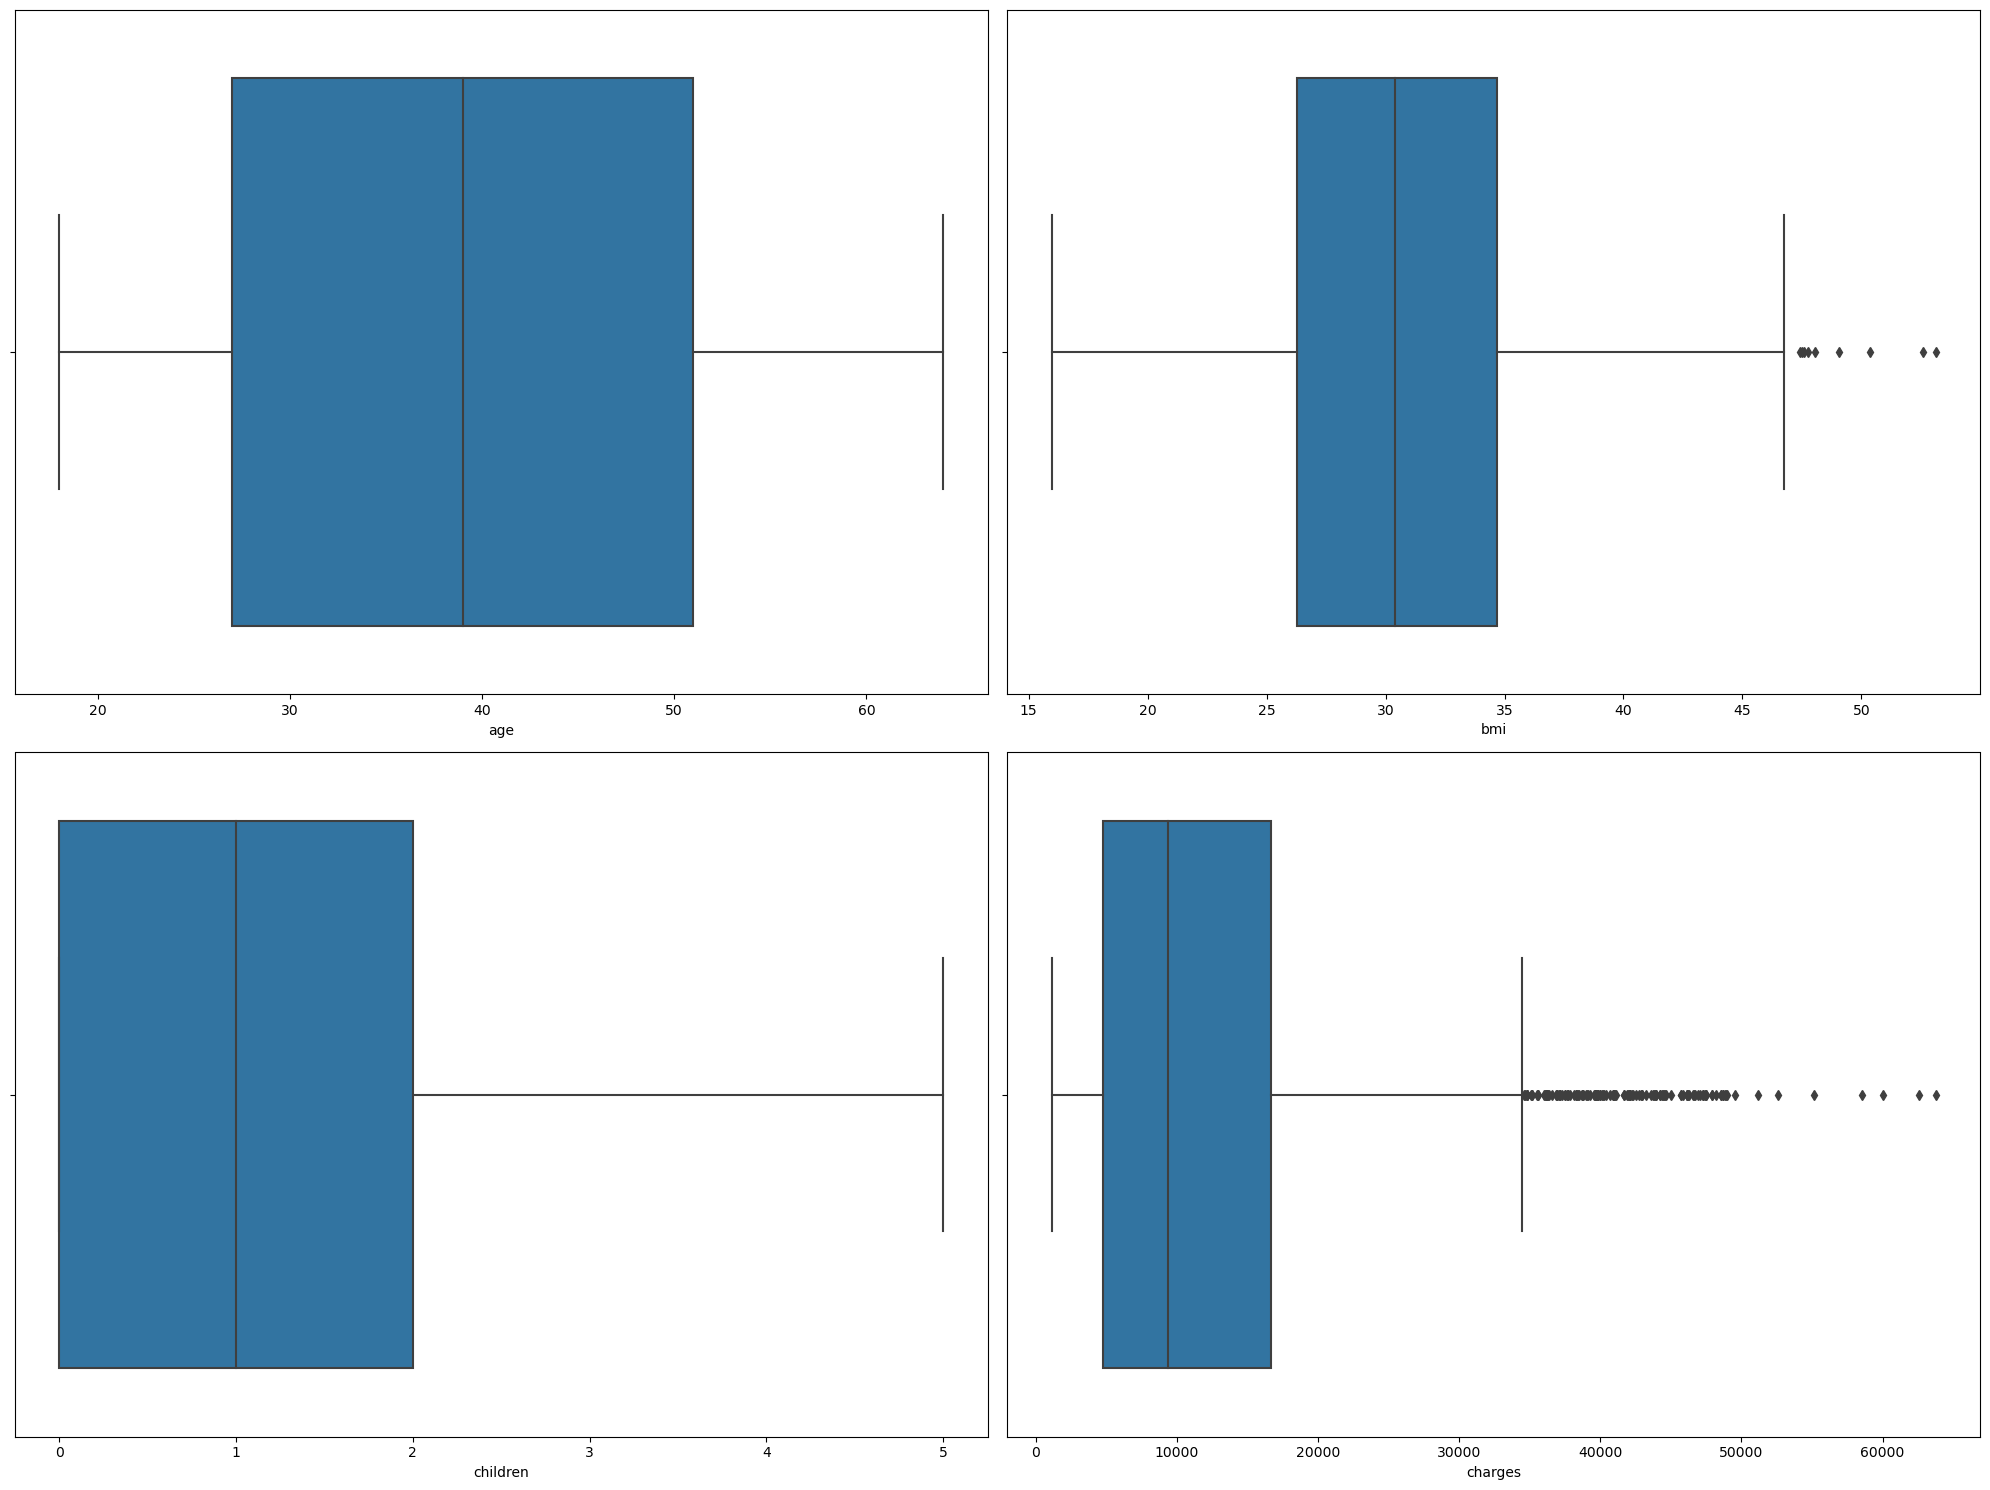

In [60]:
# plot outliers
fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(numericos):
    ax = axes[i]
    sns.boxplot(data = df, x = df[column], ax=ax)

plt.tight_layout()
plt.show()

### encoding

In [62]:
# encoding
label = LabelEncoder()
df[categoricos] = df[categoricos].apply(label.fit_transform)    

In [63]:
# check
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### correlações

In [66]:
import scipy.stats as stats
# teste shapiro para normalidade
"""
Ho = distribuição normal : p > 0.05
Ha = distribuição != normal : p <= 0.05
"""
for col in df.columns:
    estatistica, p = stats.shapiro(df[col])
    print(col)
    print(f'estatisca do teste : {estatistica}')
    print(f'p-valor = {p}')
    if p > 0.05:
        print('distribuição normal\n')
    else:
        print('distribuição não normal\n')

age
estatisca do teste : 0.9446989893913269
p-valor = 5.687060076887153e-22
distribuição não normal

sex
estatisca do teste : 0.6365700960159302
p-valor = 0.0
distribuição não normal

bmi
estatisca do teste : 0.9938861727714539
p-valor = 2.6033414542325772e-05
distribuição não normal

children
estatisca do teste : 0.8231810331344604
p-valor = 5.06690727121734e-36
distribuição não normal

smoker
estatisca do teste : 0.4950329065322876
p-valor = 0.0
distribuição não normal

region
estatisca do teste : 0.8594483137130737
p-valor = 5.87728477704126e-33
distribuição não normal

charges
estatisca do teste : 0.8146880865097046
p-valor = 1.1505194006561963e-36
distribuição não normal



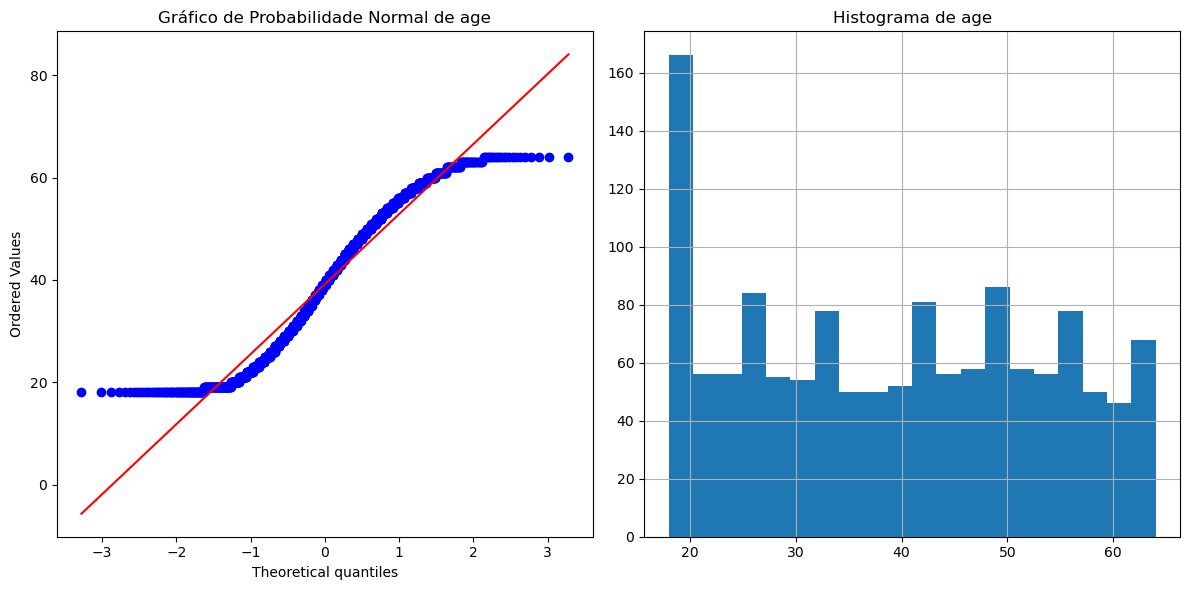

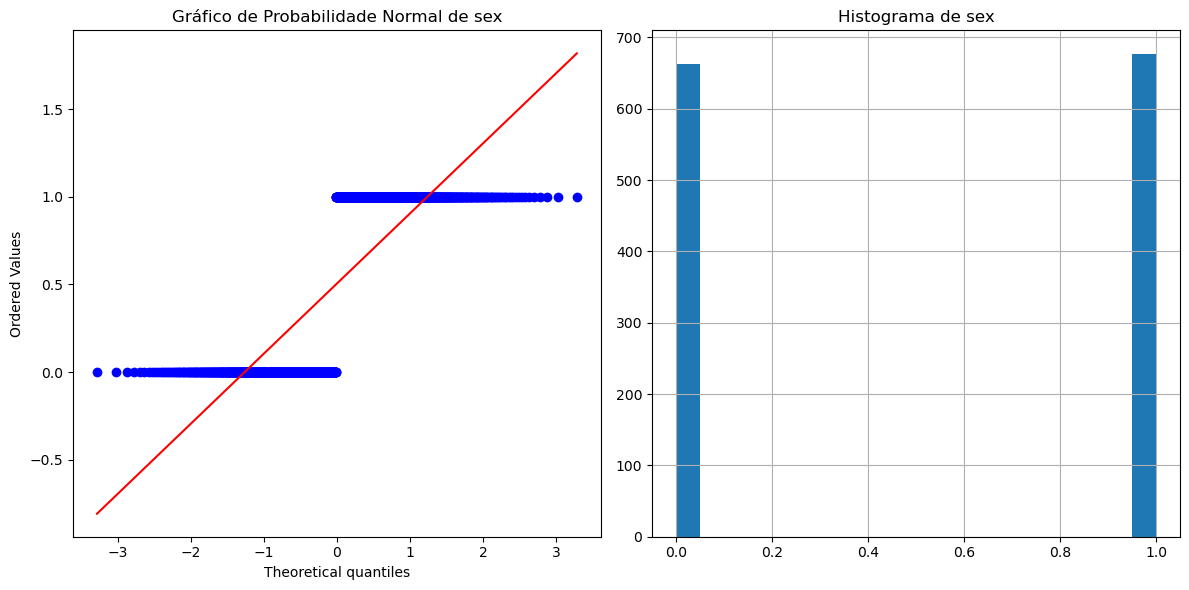

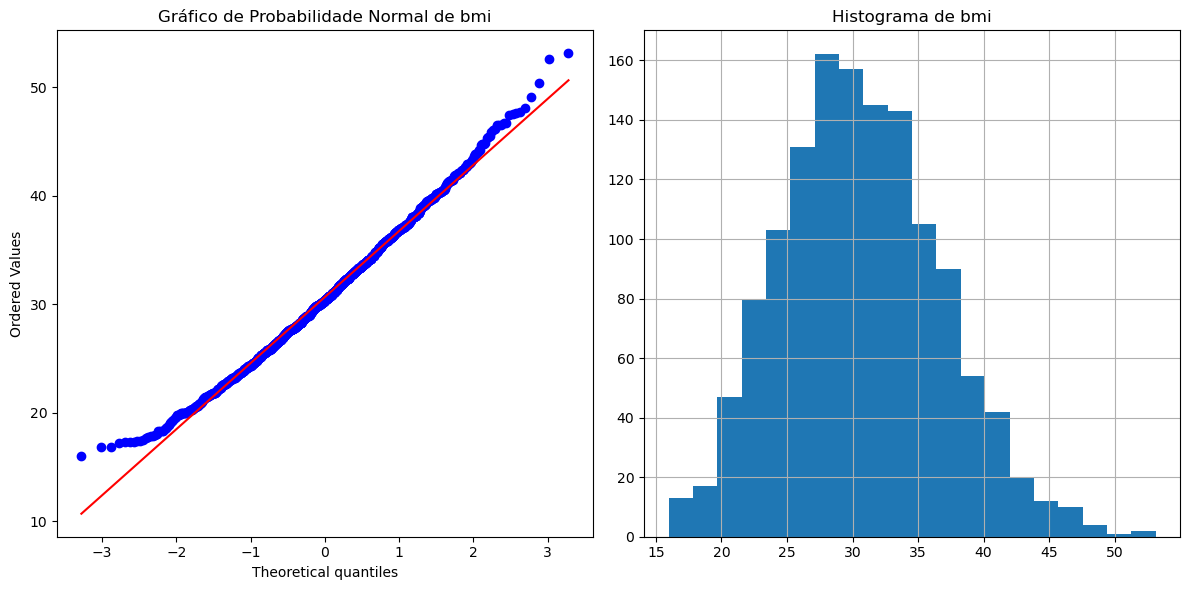

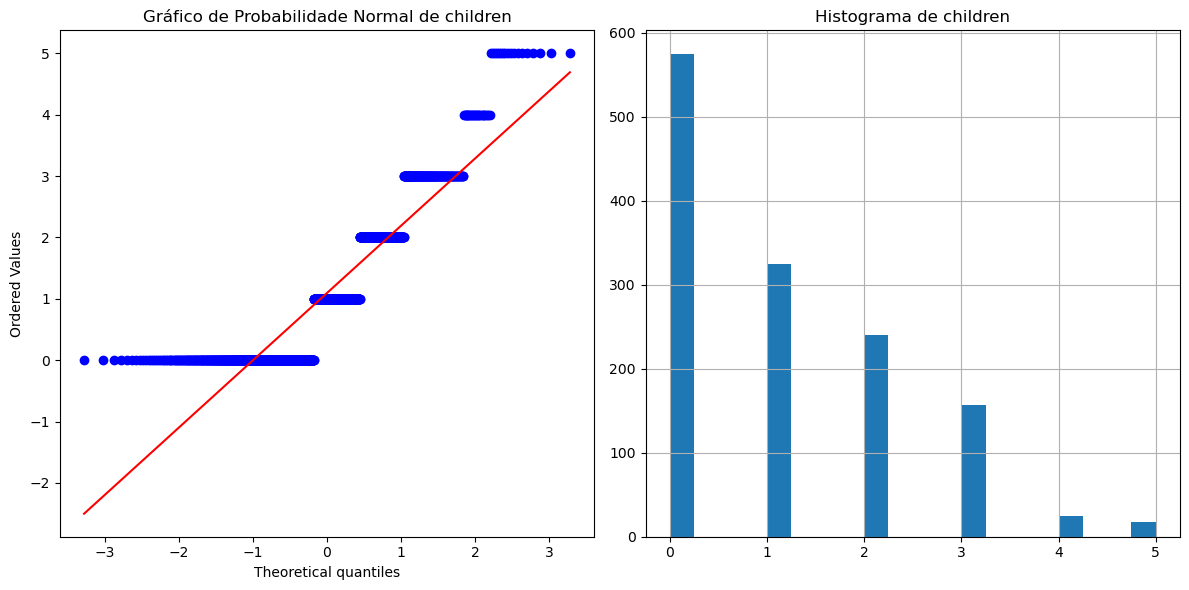

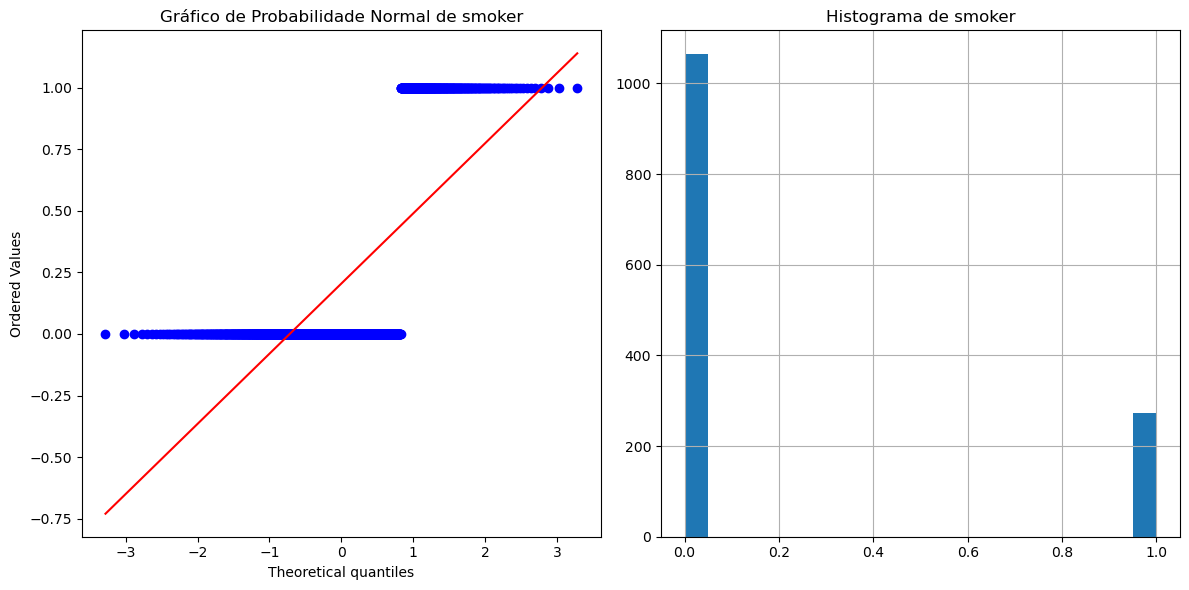

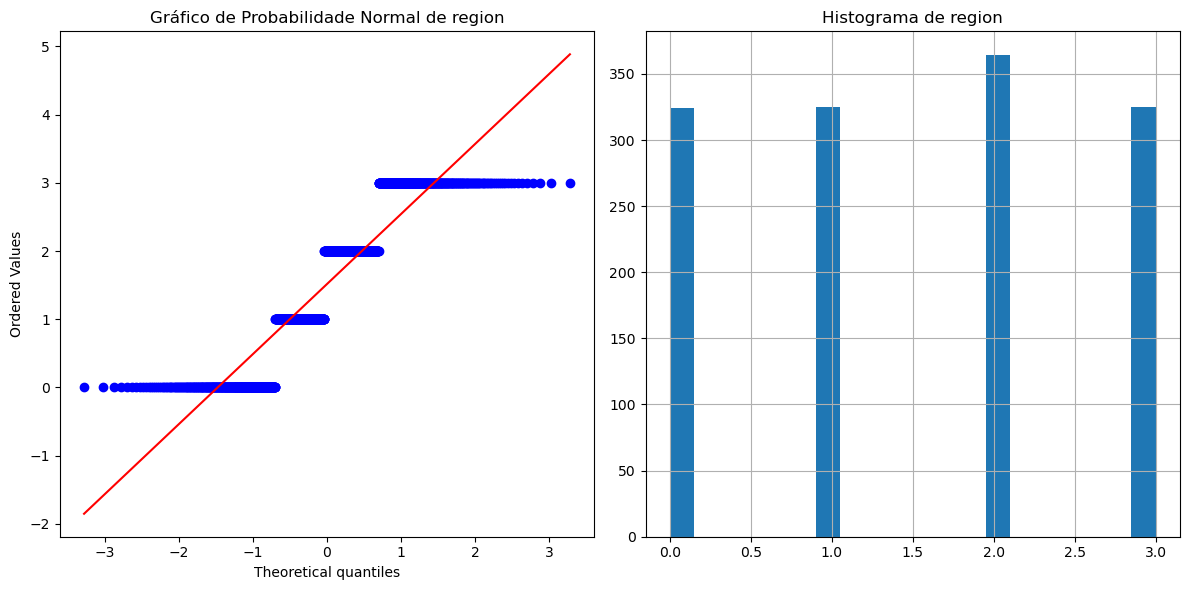

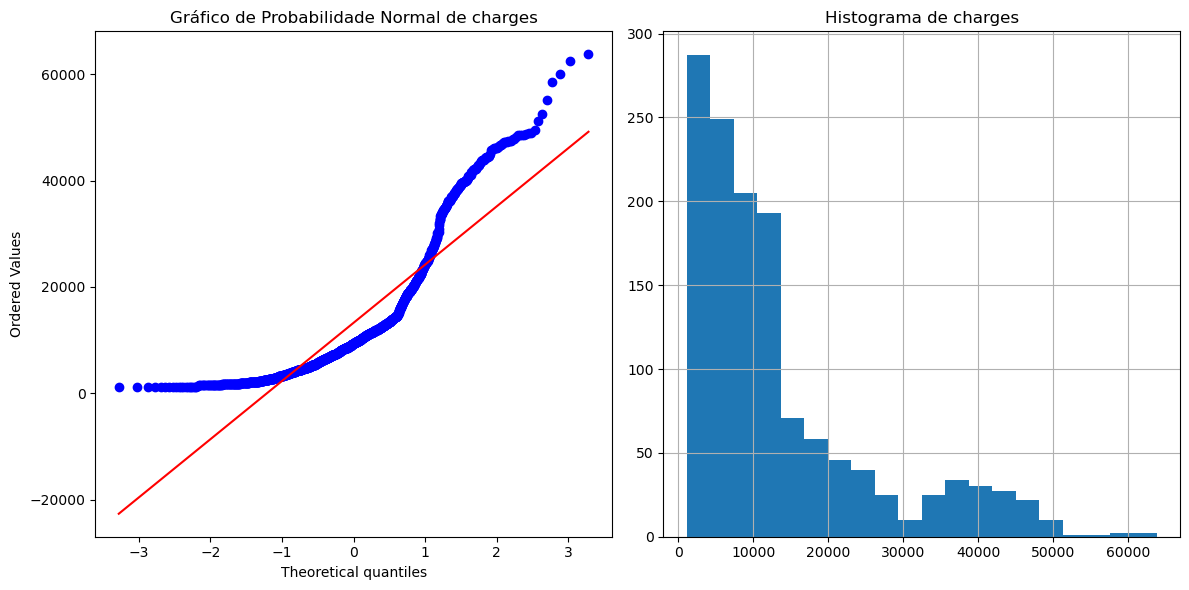

In [70]:
# check normalidade dos dados
for col in df.columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    stats.probplot(df[col], dist="norm", plot=axs[0])
    axs[0].set_title(f'Gráfico de Probabilidade Normal de {col}')
    
    df[col].hist(ax=axs[1], bins=20)
    axs[1].set_title(f'Histograma de {col}')

    fig.tight_layout()
    plt.show()

In [67]:
# correlações
"""
Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)


Ho = não há correlação linear: p > 0,05
Ha = existe correlação linear: p <= 0,05
"""
for col in df.columns:
    coef, p = stats.spearmanr(df.charges, df[col])
    print(col)
    print('Coeficiente de correlação: {}'.format(coef))
    print('p-valor: {}'.format(p))
    if p > 0.05:
        print('não há correlação linear\n')
    else:
        print('existe correlação linear\n')

age
Coeficiente de correlação: 0.534392133771846
p-valor: 1.1306920278035412e-99
existe correlação linear

sex
Coeficiente de correlação: 0.009489705930109288
p-valor: 0.728738333936428
não há correlação linear

bmi
Coeficiente de correlação: 0.11939590358331147
p-valor: 1.1926059544526826e-05
existe correlação linear

children
Coeficiente de correlação: 0.13333894319168219
p-valor: 9.846806132997262e-07
existe correlação linear

smoker
Coeficiente de correlação: 0.6634600597131322
p-valor: 1.634763754177981e-170
existe correlação linear

region
Coeficiente de correlação: -0.04353062201439266
p-valor: 0.11148382473345794
não há correlação linear

charges
Coeficiente de correlação: 1.0
p-valor: 0.0
existe correlação linear



In [68]:
# check correlação
df.corr(method='spearman')['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.663460
age         0.534392
children    0.133339
bmi         0.119396
sex         0.009490
region     -0.043531
Name: charges, dtype: float64

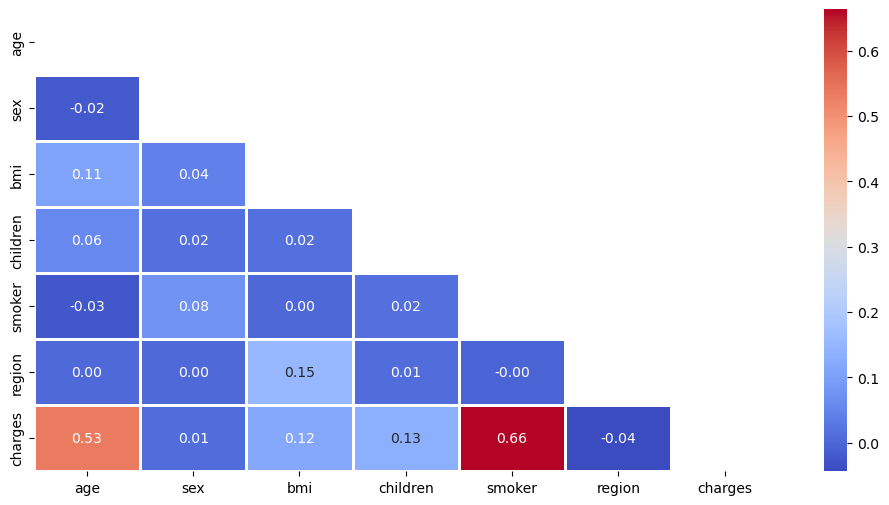

In [69]:
# plot correlação
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))  # mascara para o triangulo superior

plt.figure(figsize=(12,6))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [78]:
# persistindo dados
df.to_csv('../data/insurance-encoded.csv', sep=',', encoding='utf-8')